In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\Naushad Ji\Desktop\Bhiwadi2022\Bhiwadi2022_Uni_LSTM.csv',
                                parse_dates=['DateTime'],
                                index_col=['DateTime'])

df.head()

,PM2.5
DateTime,
2021-01-01 00:00:00,389.82
2021-01-01 01:00:00,396.16
2021-01-01 02:00:00,332.44
2021-01-01 03:00:00,274.54
2021-01-01 04:00:00,294.05


In [3]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [4]:
scaled_dataset[:2,:]

array([[0.58099809],
       [0.59044837]])

In [5]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [6]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (12829, 1)
X (12829, 4, 1)


In [7]:
#Splitting the dataset 12829 * .3=3848-12829=8981
n_train = 3848
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (8981, 4, 1)
X_test (3848, 4, 1)
Y_train (8981, 1)
Y_test (3848, 1)


In [8]:
#Importing LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from keras import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
history = model.fit(X_train, Y_train, epochs=100,
                    batch_size=22, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)

Epoch 1/100
409/409 - 7s - loss: 0.0019 - val_loss: 0.0021 - 7s/epoch - 17ms/step
Epoch 2/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 3/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 4/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 5/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 6/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 7/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 8/100
409/409 - 6s - loss: 0.0018 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 9/100
409/409 - 6s - loss: 0.0018 - val_loss: 0.0021 - 6s/epoch - 15ms/step
Epoch 10/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 14ms/step
Epoch 11/100
409/409 - 6s - loss: 0.0018 - val_loss: 0.0021 - 6s/epoch - 15ms/step
Epoch 12/100
409/409 - 6s - loss: 0.0019 - val_loss: 0.0021 - 6s/epoch - 16ms/step
Epoch 13/100


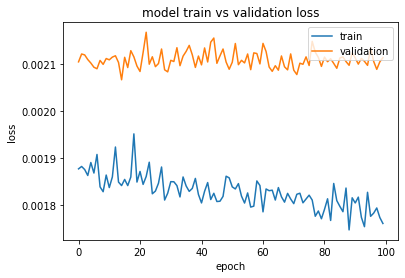

In [17]:
# plot train and validation loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()